In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
turbine_telemetry = pd.read_csv("Turbine_telemetry.csv")
residential_demand = pd.read_csv("Residential_demand.csv")

In [19]:
# Inspect the data
#turbine_telemetry.head()
residential_demand.head()
#turbine_telemetry.info()
#residential_demand.info()
#turbine_telemetry.describe()
#residential_demand.describe()

,Timestamp,Demand_mean_kw,N_households
0,01/01/2017 00:00,0.220106,5428
1,01/01/2017 00:30,0.205945,5429
2,01/01/2017 01:00,0.189090,5429
3,01/01/2017 01:30,0.173118,5429
4,01/01/2017 02:00,0.159051,5429


In [4]:
# Remove rows with missing values
turbine_telemetry.dropna(inplace=True)

In [5]:
#Convert timestamps to datetime objects
turbine_telemetry['Timestamp'] = pd.to_datetime(turbine_telemetry['Timestamp'])
residential_demand['Timestamp'] = pd.to_datetime(residential_demand['Timestamp'])

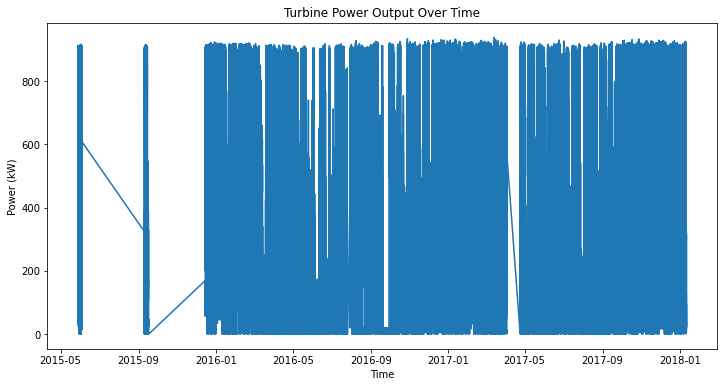

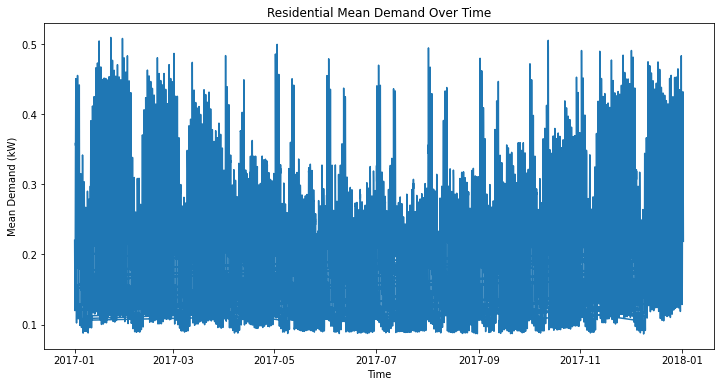

In [22]:
# Time series plots
plt.figure(figsize=(12,6))
plt.plot(turbine_telemetry['Timestamp'], turbine_telemetry['Power_kw'])
plt.xlabel('Time')
plt.ylabel('Power (kW)')
plt.title('Turbine Power Output Over Time')
plt.show()

plt.figure(figsize=(12,6))
plt.plot(residential_demand['Timestamp'], residential_demand['Demand_mean_kw'])
plt.xlabel('Time')
plt.ylabel('Mean Demand (kW)')
plt.title('Residential Mean Demand Over Time')
plt.show()

<AxesSubplot:xlabel='Power_kw', ylabel='Count'>

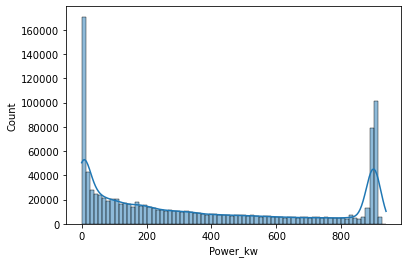

In [23]:
# Histograms and distribution plots turbine telemetry
sns.histplot(turbine_telemetry['Power_kw'], kde=True)

<AxesSubplot:xlabel='Demand_mean_kw', ylabel='Count'>

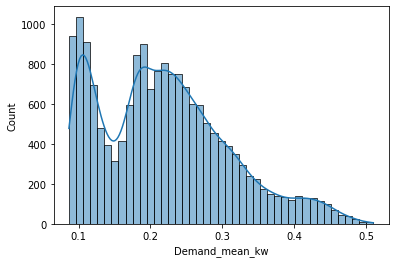

In [24]:
# Histograms and distribution plots residential demand
sns.histplot(residential_demand['Demand_mean_kw'], kde=True)

<AxesSubplot:xlabel='Wind_ms', ylabel='Power_kw'>

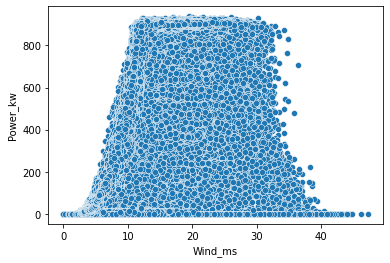

In [25]:
# Scatter plots to explore relationships between variables
sns.scatterplot(x='Wind_ms', y='Power_kw', data=turbine_telemetry)

<AxesSubplot:xlabel='N_households', ylabel='Demand_mean_kw'>

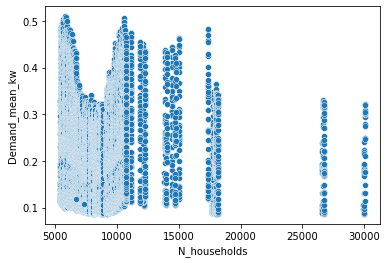

In [26]:
# Scatter plots to explore relationships between variables
sns.scatterplot(x='N_households', y='Demand_mean_kw', data=residential_demand)

<AxesSubplot:>

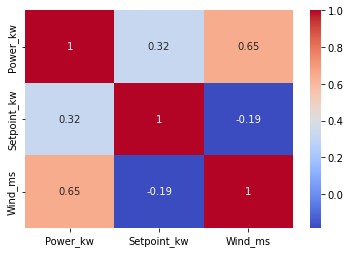

In [27]:
# Heatmaps for correlations
corr_turbine = turbine_telemetry.corr()
sns.heatmap(corr_turbine, annot=True, cmap='coolwarm')

<AxesSubplot:>

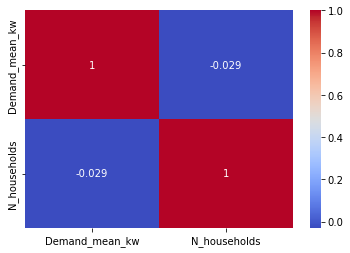

In [28]:
# Heatmaps for correlations
corr_demand = residential_demand.corr()
sns.heatmap(corr_demand, annot=True, cmap='coolwarm')

## Demand Analysis
We want to first get an idea of the total energy consumption. From national statistics, we know the total number of househoulds in the region is 10,000. Based on the that and the mean demand from the samples taking, we can make an estimate for the total demand in the Orkney region

In [6]:
#Calculate Total demand
residential_demand['Total_demand_kw'] = residential_demand['Demand_mean_kw'] * 10000
residential_demand.head()

,Timestamp,Demand_mean_kw,N_households,Total_demand_kw
0,2017-01-01 00:00:00,0.220106,5428,2201.064849
1,2017-01-01 00:30:00,0.205945,5429,2059.451096
2,2017-01-01 01:00:00,0.189090,5429,1890.898876
3,2017-01-01 01:30:00,0.173118,5429,1731.180696
4,2017-01-01 02:00:00,0.159051,5429,1590.506539


Next, we will aggregate the total demand by seasons to understand how much energy is required in each season of the year

In [7]:
# Ensure the Timestamp column is in datetime format
residential_demand['Timestamp'] = pd.to_datetime(residential_demand['Timestamp'])

# Create a dictionary to map months to seasons
month_to_season = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Autumn', 10: 'Autumn', 11: 'Autumn'
}

# Create a new 'Season' column by mapping the month of each timestamp to its corresponding season
residential_demand['Season'] = residential_demand['Timestamp'].dt.month.map(month_to_season)

# Calculate the total demand for each season
total_demand_by_season = residential_demand.groupby('Season')['Total_demand_kw'].sum()

# Calculate the average demand for each season
average_demand_by_season = residential_demand.groupby('Season')['Total_demand_kw'].mean()

# Print the total and average demand per season
print("Total demand per season:\n", total_demand_by_season)
print("\nAverage demand per season:\n", average_demand_by_season)

Total demand per season:
 Season
Autumn    9.550978e+06
Spring    9.341603e+06
Summer    8.238682e+06
Winter    1.135854e+07
Name: Total_demand_kw, dtype: float64

Average demand per season:
 Season
Autumn    2186.579242
Spring    2115.399138
Summer    1865.643467
Winter    2600.398854
Name: Total_demand_kw, dtype: float64


   Season  Demand_mean_kw
0  Autumn        0.220924
1  Spring        0.213391
2  Summer        0.198424
3  Winter        0.243913


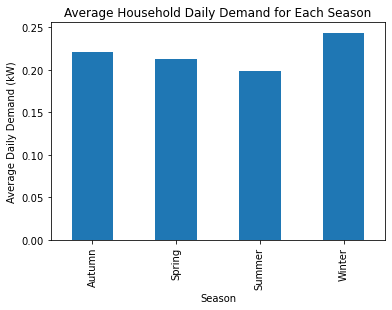

In [16]:
# Extract date from Timestamp
residential_demand['Date'] = residential_demand['Timestamp'].dt.date

# Group by Season and Date, then calculate mean, then again group by Season and calculate mean
average_daily_demand = residential_demand.groupby(['Season', 'Date'])['Demand_mean_kw'].mean().reset_index()
average_daily_demand = average_daily_demand.groupby('Season')['Demand_mean_kw'].mean().reset_index()

# Output the result
print(average_daily_demand)

# Bar plot
average_daily_demand.plot(x='Season', y='Demand_mean_kw', kind='bar', legend=False)

# Labels and title
plt.xlabel('Season')
plt.ylabel('Average Daily Demand (kW)')
plt.title('Average Household Daily Demand for Each Season')

plt.show()

Next we will plot the average daily demand patterns for each season

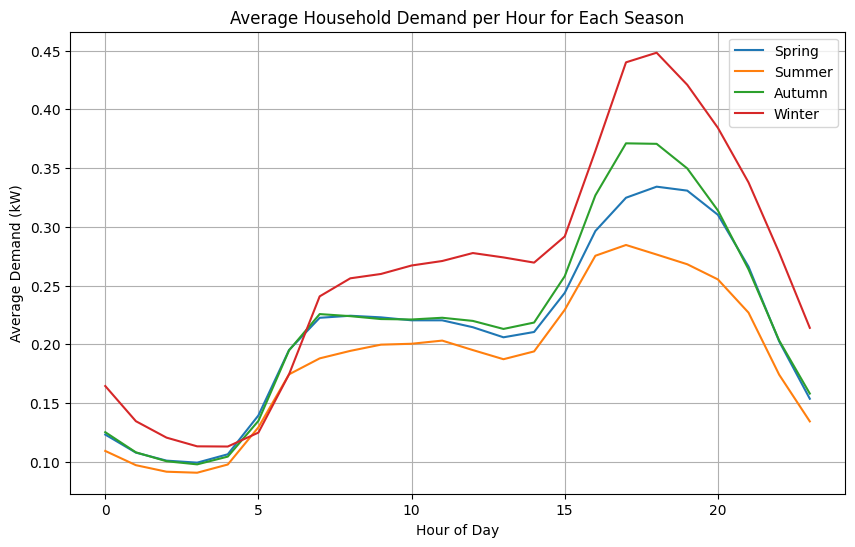

In [8]:
# Extract hour from Timestamp
residential_demand['Hour'] = residential_demand['Timestamp'].dt.hour

# Group by Season and Hour, then calculate mean
average_demand_hourly = residential_demand.groupby(['Season', 'Hour'])['Demand_mean_kw'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))

for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    subset = average_demand_hourly[average_demand_hourly['Season'] == season]
    plt.plot(subset['Hour'], subset['Demand_mean_kw'], label=season)

plt.title('Average Household Demand per Hour for Each Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Demand (kW)')
plt.legend()
plt.grid()
plt.show()

Different amounts of energy is used for heating in different months so we have to multiply the total demand by factors to get the energy demand used for heating in different seasons.

In [9]:
# Define a dictionary with the heating percentages for each season
heating_percentages = {'Winter': 0.85, 'Spring': 0.70, 'Summer': 0.20, 'Autumn': 0.50}

# Function to apply
def calculate_heating_demand(row):
    return row['Total_demand_kw'] * heating_percentages[row['Season']]

# Apply the function to create the new column
residential_demand['Heating_demand_kw'] = residential_demand.apply(calculate_heating_demand, axis=1)

residential_demand.head()

,Timestamp,Demand_mean_kw,N_households,Total_demand_kw,Season,Hour,Heating_demand_kw
0,2017-01-01 00:00:00,0.220106,5428,2201.064849,Winter,0,1870.905122
1,2017-01-01 00:30:00,0.205945,5429,2059.451096,Winter,0,1750.533432
2,2017-01-01 01:00:00,0.189090,5429,1890.898876,Winter,1,1607.264045
3,2017-01-01 01:30:00,0.173118,5429,1731.180696,Winter,1,1471.503592
4,2017-01-01 02:00:00,0.159051,5429,1590.506539,Winter,2,1351.930558


In [10]:
# Function to apply
def calculate_average_heating_demand(row):
    return row['Demand_mean_kw'] * heating_percentages[row['Season']]

# Apply the function to create the new column
residential_demand['Average_Heating_demand_kw'] = residential_demand.apply(calculate_average_heating_demand, axis=1)

residential_demand.head()

,Timestamp,Demand_mean_kw,N_households,Total_demand_kw,Season,Hour,Heating_demand_kw,Average_Heating_demand_kw
0,2017-01-01 00:00:00,0.220106,5428,2201.064849,Winter,0,1870.905122,0.187091
1,2017-01-01 00:30:00,0.205945,5429,2059.451096,Winter,0,1750.533432,0.175053
2,2017-01-01 01:00:00,0.189090,5429,1890.898876,Winter,1,1607.264045,0.160726
3,2017-01-01 01:30:00,0.173118,5429,1731.180696,Winter,1,1471.503592,0.147150
4,2017-01-01 02:00:00,0.159051,5429,1590.506539,Winter,2,1351.930558,0.135193


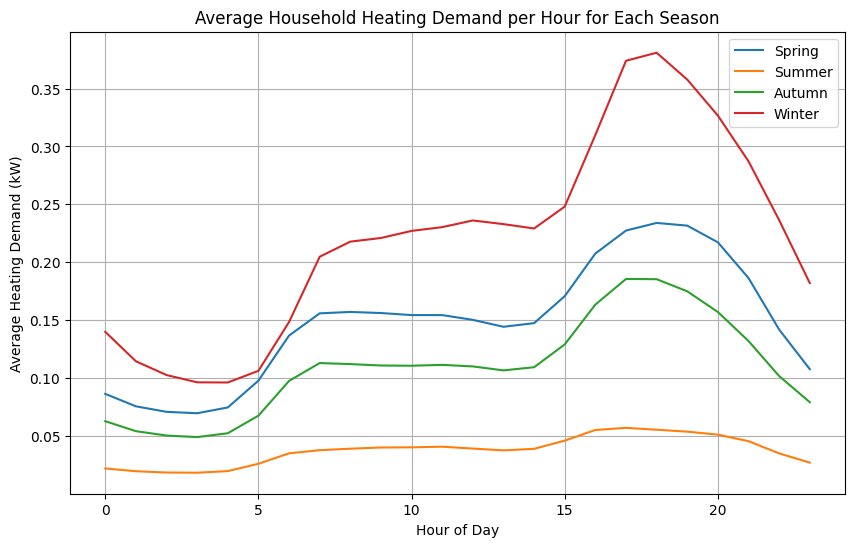

In [13]:
# Extract hour from Timestamp
residential_demand['Hour'] = residential_demand['Timestamp'].dt.hour

# Group by Season and Hour, then calculate mean
average_heating_demand_hourly = residential_demand.groupby(['Season', 'Hour'])['Average_Heating_demand_kw'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))

for season in ['Spring', 'Summer', 'Autumn', 'Winter']:
    subset = average_heating_demand_hourly[average_heating_demand_hourly['Season'] == season]
    plt.plot(subset['Hour'], subset['Average_Heating_demand_kw'], label=season)

plt.title('Average Household Heating Demand per Hour for Each Season')
plt.xlabel('Hour of Day')
plt.ylabel('Average Heating Demand (kW)')
plt.legend()
plt.grid()
plt.show()

## Electric Heaters
For our demand side repsonse to the curtailment, we have decided to make use of the Dimplex quantum electric heaters in order to store some of the energy being curtailed. The model we have chosen for this project has a power rating of 3.3kw and a storage capacity of 22kwh.

We have chosen Dimplex for the following reasons:
1. It is low cost when compared to other standard storage heater systems.
2. It is easy to install and use
3. After charge, it can store energy for up to 24 hours and that stored energy can be used during peak periods.
4. It possesses a highly intelligent controller and self learning algorithm that can adapt based on weather conditions and seasons of the year.
5. It has a warranty of 2 years which can be extended to 10 years meaning that the company and participants will be protected in the case the equipment dont work as they are supposed to.



In [9]:
import pandas as pd

#curtailment from 2015 to 2016

# Resample the data to 30-minute intervals and calculate the amount curtailed
telemetry_data_resampled = turbine_telemetry.resample('30T', on ='Timestamp').mean()
telemetry_data_resampled['Amount_Curtailed'] = telemetry_data_resampled['Power_kw'] - telemetry_data_resampled['Setpoint_kw']

# Set negative values to zero (ignore them)
telemetry_data_resampled.loc[telemetry_data_resampled['Amount_Curtailed'] < 0, 'Amount_Curtailed'] = 0

# Print the resulting DataFrame
print(telemetry_data_resampled)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [14]:
import pandas as pd


# Convert the Timestamp column to datetime format
turbine_telemetry['Timestamp'] = pd.to_datetime(turbine_telemetry['Timestamp'])

# Filter the data for the year 2017
telemetry_data_2017 = turbine_telemetry[turbine_telemetry['Timestamp'].dt.year == 2017]

# Resample the data to 30-minute intervals and calculate the amount curtailed
telemetry_data_resampled = telemetry_data_2017.resample('30T', on='Timestamp').mean()
telemetry_data_resampled['Amount_Curtailed'] = telemetry_data_resampled['Power_kw'] - telemetry_data_resampled['Setpoint_kw']

# Set negative values to zero (ignore them)
telemetry_data_resampled.loc[telemetry_data_resampled['Amount_Curtailed'] < 0, 'Amount_Curtailed'] = 0

# Calculate the average curtailed power in 2017
average_curtailed_power_2017 = telemetry_data_resampled['Amount_Curtailed'].mean()

# Print the average curtailed power
print("Average Curtailed Power in 2017:", average_curtailed_power_2017)



Average Curtailed Power in 2017: 0.7390562957641692


In [15]:
#curtailment for just 2017

# Convert the Timestamp column to datetime format
turbine_telemetry['Timestamp'] = pd.to_datetime(turbine_telemetry['Timestamp'])

# Filter the data for the year 2017
telemetry_data_2017 = turbine_telemetry[turbine_telemetry['Timestamp'].dt.year == 2017]

# Resample the data to 30-minute intervals and calculate the amount curtailed
telemetry_data_resampled = telemetry_data_2017.resample('30T', on='Timestamp').mean()
telemetry_data_resampled['Amount_Curtailed'] = telemetry_data_resampled['Power_kw'] - telemetry_data_resampled['Setpoint_kw']

# Set negative values to zero (ignore them)
telemetry_data_resampled.loc[telemetry_data_resampled['Amount_Curtailed'] < 0, 'Amount_Curtailed'] = 0

# Print the resulting DataFrame
print(telemetry_data_resampled)

                       Power_kw  Setpoint_kw    Wind_ms  Amount_Curtailed
Timestamp                                                                
2017-01-01 00:00:00  894.033333        900.0  13.820000          0.000000
2017-01-01 00:30:00  898.266667        900.0  16.106667          0.000000
2017-01-01 01:00:00  902.866667        900.0  16.380000          2.866667
2017-01-01 01:30:00  907.833333        900.0  17.083333          7.833333
2017-01-01 02:00:00  907.000000        900.0  16.800000          7.000000
...                         ...          ...        ...               ...
2017-12-31 21:30:00  478.933333        900.0   9.880000          0.000000
2017-12-31 22:00:00  278.133333        900.0   8.226667          0.000000
2017-12-31 22:30:00  177.700000        900.0   7.210000          0.000000
2017-12-31 23:00:00  113.466667        900.0   6.130000          0.000000
2017-12-31 23:30:00   51.166667        900.0   4.846667          0.000000

[17520 rows x 4 columns]


In [16]:
telemetry_data_resampled.head()

,Power_kw,Setpoint_kw,Wind_ms,Amount_Curtailed
Timestamp,,,,
2017-01-01 00:00:00,894.033333,900.0,13.820000,0.000000
2017-01-01 00:30:00,898.266667,900.0,16.106667,0.000000
2017-01-01 01:00:00,902.866667,900.0,16.380000,2.866667
2017-01-01 01:30:00,907.833333,900.0,17.083333,7.833333
2017-01-01 02:00:00,907.000000,900.0,16.800000,7.000000


In [18]:
# Reset the indices
#telemetry_data_resampled = telemetry_data_resampled.reset_index()
#residential_demand = residential_demand.reset_index()

# Merge the DataFrames
residential_demand_extra = pd.merge(residential_demand, telemetry_data_resampled[['Timestamp', 'Amount_Curtailed']], on='Timestamp', how='left')

residential_demand_extra.head()

,index,Timestamp,Demand_mean_kw,N_households,Total_demand_kw,Season,Hour,Heating_demand_kw,Average_Heating_demand_kw,Amount_Curtailed
0,0,2017-01-01 00:00:00,0.220106,5428,2201.064849,Winter,0,1870.905122,0.187091,0.000000
1,1,2017-01-01 00:30:00,0.205945,5429,2059.451096,Winter,0,1750.533432,0.175053,0.000000
2,2,2017-01-01 01:00:00,0.189090,5429,1890.898876,Winter,1,1607.264045,0.160726,2.866667
3,3,2017-01-01 01:30:00,0.173118,5429,1731.180696,Winter,1,1471.503592,0.147150,7.833333
4,4,2017-01-01 02:00:00,0.159051,5429,1590.506539,Winter,2,1351.930558,0.135193,7.000000


In [18]:
# Create a 'Day' column
#residential_demand_extra['Day'] = residential_demand_extra['Timestamp'].dt.date

# Group by 'Season' and 'Day' and calculate the mean curtailment
#daily_avg_curtailment_by_season = residential_demand_extra.groupby(['Season', 'Day'])['Amount_Curtailed'].mean().reset_index()

# Group by 'Season' and calculate the mean of daily averages
#avg_daily_curtailment_by_season = daily_avg_curtailment_by_season.groupby('Season')['Amount_Curtailed'].mean()

#print(avg_daily_curtailment_by_season)

Season
Autumn    1.053164
Spring    0.619853
Summer    0.551027
Winter    0.707580
Name: Amount_Curtailed, dtype: float64


In [1]:
#residential_demand_extra.head()

NameError: name 'residential_demand_extra' is not defined

In [22]:
telemetry_data_resampled.describe()

,level_0,index,Power_kw,Setpoint_kw,Wind_ms,Amount_Curtailed
count,17520.000000,17520.000000,16508.000000,16508.000000,16508.000000,16508.000000
mean,8759.500000,8759.500000,412.166493,844.401238,10.303835,0.739145
std,5057.732694,5057.732694,332.303217,194.763586,5.395692,3.177634
min,0.000000,0.000000,0.000000,0.000000,0.070000,0.000000
25%,4379.750000,4379.750000,95.786494,900.000000,6.416667,0.000000
50%,8759.500000,8759.500000,338.983333,900.000000,9.363333,0.000000
75%,13139.250000,13139.250000,768.144253,900.000000,13.043333,0.000000
max,17519.000000,17519.000000,909.033333,900.000000,36.196667,47.600000


In [24]:
#curtailment_count = residential_demand_extra[residential_demand_extra['Amount_Curtailed'] > 0].shape[0]
#print(f'Number of rows where curtailment is above 0: {curtailment_count}')

#total_curtailment = residential_demand_extra['Amount_Curtailed'].sum()
#print(f'Total amount curtailed: {total_curtailment}')

Number of rows where curtailment is above 0: 1725
Total amount curtailed: 12201.811012242688


In [26]:

# Convert the Timestamp column to datetime format if it's not
residential_demand_extra['Timestamp'] = pd.to_datetime(residential_demand_extra['Timestamp'])

# Set the Timestamp column as the index (required for plotting)
residential_demand_extra.set_index('Timestamp', inplace=True)

# Plot Average_Heating_demand_kw
residential_demand_extra['Average_Heating_demand_kw'].plot(label='Average Heating Demand (kW)', figsize=(12,6))

# Plot Amount_Curtailed on the same axes
residential_demand_extra['Amount_Curtailed'].plot(secondary_y=True, label='Amount Curtailed', linestyle='--')

plt.title('Average Heating Demand and Amount Curtailed over Time')
plt.ylabel('Average Heating Demand (kW)')
plt.right_ax.set_ylabel('Amount Curtailed')
plt.legend(loc='best')

plt.show()

KeyError: 'Timestamp'